In [123]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

## Problem 1

#### (1)
The best order of tasting one at a time is choose the one with the largest probability among the rest. So first choose the one with $p_1 = \frac{8}{23}$

In [124]:
p = np.array([8., 6., 4., 2., 2., 1.]) / 23
print 'The expected number of tasting:', np.sum(p*np.array(range(1, 6) + [5]))

The expected number of tasting: 2.39130434783


#### (2)
This can be seen as a coding problem and the minimum expected number of tasting can be given by Huffman coding.

| id | p | code |
| --- | --- | --- |
| 1 | 8/23 | 00 |
| 2 | 6/23 | 01 |
| 3 | 4/23 | 10 |
| 4 | 2/23 | 110 |
| 5 | 2/23 | 1110 |
| 6 | 1/23 | 1111 |


In [125]:
code_len = np.array([2, 2, 2, 3, 4, 4])
print 'The expected number of tasting:', np.sum(p*code_len)

The expected number of tasting: 2.34782608696


The first mixture to be taste is the mixture of 1 and 2, or the mixture of 3, 4, 5, 6

## Problem 2

We first prove that the Huffman tree has height between [6, 7]:

1. Huffman tree has height $\geq 6$
    * Assume that there exists a leaf node that has height 5, then there must be a leaf node that has height $\geq 7$, or the total leaf node would be less than 100. In this condition, we can expand the node that has height 5, and move the node with height 7 to one of the branches of the expanded node.
2. Huffman tree has height $\leq 7$
    * Similar to the proof of 1.

Thus we can calculate the expected length as:

In [126]:
print 'Expected length:', 28./100*6 + (100 - 28.)/100*7

Expected length: 6.72


## Problem 3

According to the horse race problem. The optimal doubling rate is achieved when using propotional investment. That is
$$
b_i = p_i = \frac{1}{4}
$$
The optimal doubling rate:
$$
W^*(b,p) = \sum_{i=1}^4 p_i\log o_i - H(p) = 2 - \frac{7}{4} = \frac{1}{4}
$$
And
$$
S_n = 2^{nW^*(b,p)}
$$
The expected wealth after $n=20$ games:
$$
100S_{20} = 100\times 2^{20\times1/4} = 3200
$$

## Problem 4

#### (a)

| p | code |
| --- | --- |
| 1/3 | 00 |
| 1/3 | 00 |
| 1/4 | 10 |
| 1/12 | 11 |


#### (b)
Not unique, another optimal code can be

| p | code |
| --- | --- |
| 1/3 | 0 |
| 1/3 | 10 |
| 1/4 | 111 |
| 1/12 | 110 |


#### (c)
Shannon code length:

| p | code length |
| --- | :---: |
| 1/3 | 2 |
| 1/3 | 2 |
| 1/4 | 2 |
| 1/12 | 4 |

No, as the code in (b)

## Problem 5

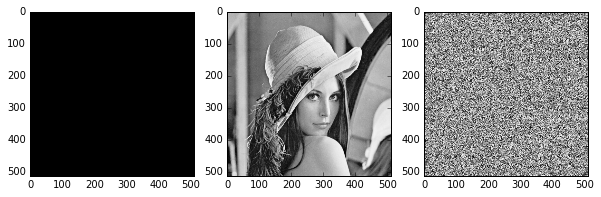

In [127]:
import skimage
from skimage import io

empty = io.imread('hw4/empty.bmp')
lena = io.imread('hw4/lena.bmp')
random = io.imread('hw4/random.bmp')
images = [empty, lena, random]
names = ['empty', 'lena', 'random']

fig = plt.figure(figsize=(10, 10))
for i in xrange(3):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.imshow(images[i], cmap='Greys_r')

#### (a)

In [128]:
entropies = []
for name, img in zip(names, images):
    img = img.astype('int')
    values, counts = np.unique(img.flat, return_counts=True)
    p = counts.astype('float')/counts.sum()
    entropy = np.sum(-p*np.log2(p))
    entropies.append(entropy)
    redun = 8. - entropy
    print '%s: entropy=%.2f, relative redundancy=%.2f' % (name, entropy, redun)
    

empty: entropy=0.00, relative redundancy=8.00
lena: entropy=7.45, relative redundancy=0.55
random: entropy=8.00, relative redundancy=0.00


#### (b)
PNG uses lossless codes.

In [129]:
png_bits = np.array([0.355, 147.7, 257.])*1e3*8 / (512*512)
print '[PNG] Average bits usage per pixel:'
for i, name in enumerate(names):
    print '%s: %.2f' % (name, png_bits[i])
png_redun = png_bits - np.array(entropies)
print '[PNG] Redundancy:'
for i, name in enumerate(names):
    print '%s: %.2f' % (name, png_redun[i])

[PNG] Average bits usage per pixel:
empty: 0.01
lena: 4.51
random: 7.84
[PNG] Redundancy:
empty: 0.01
lena: -2.94
random: -0.15


#### (c)
We test ZIP.

In [131]:
zip_bits = np.array([1.4, 208.3, 257.2])*1e3*8 / (512*512)
print '[ZIP] Average bits usage per pixel:'
for i, name in enumerate(names):
    print '%s: %.2f' % (name, zip_bits[i])
zip_redun = zip_bits - np.array(entropies)
print '[ZIP] Redundancy:'
for i, name in enumerate(names):
    print '%s: %.2f' % (name, zip_redun[i])

[ZIP] Average bits usage per pixel:
empty: 0.04
lena: 6.36
random: 7.85
[ZIP] Redundancy:
empty: 0.04
lena: -1.09
random: -0.15
